In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob
import os

In [2]:
case=[
'SAM6108_RCE_MC_20221230_256x256',

'SAM6108_RCE_MC_20221230_256x256a',

'SAM6108_RCE_MC_20221230_256x256_DC',

'SAM6108_RCE_MC_20221230_256x256_DCa']

physical_name=['(a) CTRL','(b) CTRL$_{sw}$','(c) EXPT','(d) EXPT$_{sw}$']

Below block is to create the PW files. It takes a L-O-N-G time.
But needs to be created only once. So, to be safe, I am commening the block below.

In [3]:
# var='PW'
# for i in range(len(case)):
#     #print(case[i])
#     path='/fs3/group/mullegrp/Bidyut_Goswami/sam_data/'+str(case[i])+'/OUT_'+str(case[i])+'/NETCDF_files/'
#     print(path)
#     f_in=''+str(path)+'RCE_MC_'+str(case[i])+'_64.2Dcom_'+str(var)+'.nc'
#     !rm -rf $f_in
#     print("=====================")
#     !ls -l $path/*2D*
#     print("=====================")
#     !ncrcat -v $var  $path/*2D* $f_in
#     print("=====================")
#     !ls -l $path/*PW*
#     print("=====================")

In [4]:
# Define the case names
case_names = [
    "/fs3/group/mullegrp/Bidyut_Goswami/sam_data/SAM6108_RCE_MC_20221230_256x256/OUT_SAM6108_RCE_MC_20221230_256x256/NETCDF_files/RCE_MC_SAM6108_RCE_MC_20221230_256x256_64.2Dcom_PW.nc",
    "/fs3/group/mullegrp/Bidyut_Goswami/sam_data/SAM6108_RCE_MC_20221230_256x256a/OUT_SAM6108_RCE_MC_20221230_256x256a/NETCDF_files/RCE_MC_SAM6108_RCE_MC_20221230_256x256a_64.2Dcom_PW.nc",
    "/fs3/group/mullegrp/Bidyut_Goswami/sam_data/SAM6108_RCE_MC_20221230_256x256_DC/OUT_SAM6108_RCE_MC_20221230_256x256_DC/NETCDF_files/RCE_MC_SAM6108_RCE_MC_20221230_256x256_DC_64.2Dcom_PW.nc",
    "/fs3/group/mullegrp/Bidyut_Goswami/sam_data/SAM6108_RCE_MC_20221230_256x256_DCa/OUT_SAM6108_RCE_MC_20221230_256x256_DCa/NETCDF_files/RCE_MC_SAM6108_RCE_MC_20221230_256x256_DCa_64.2Dcom_PW.nc"
]



# Function to plot PW for every 10th day for a given case name
def plot_pw_for_every_10th_day_for_case(case_name, ax, clmin,clmax, cint,shading):
#     # Construct the file directory
#     file_directory = f"/fs3/group/mullegrp/Bidyut_Goswami/sam_data/{base_file_name}{case_name}/OUT_{base_file_name}{case_name}/NETCDF_files/"
    
    
#     file_prelude="RCE_MC_"
#     base_file_name = "SAM6108_RCE_MC_20221230"
    
    
    # Generate the file names for the current case
    file_names = [f"{case_name}" for case_name in case_names]
    #print(file_names)

    
    # Iterate over each file and plot PW for every 10th day
    for i, file_name in enumerate(file_names):
        # Open the NetCDF file
        ds = xr.open_dataset(file_name)
        #ds = xr.open_dataset(os.path.join(file_directory, file_name))
        
        # Extract the time dimension
        time = ds['time']
        
        # Calculate the number of hourly timesteps
        num_timesteps = len(time)
        
        # Calculate the number of timesteps per day
        timesteps_per_day = 24
        
        # Calculate the number of days
        num_days = num_timesteps / timesteps_per_day
        
        # Calculate the number of days to plot (every 10th day)
        num_days_to_plot = int(num_days) // 10
        
        # Iterate over each 10th day and plot PW
        for j in range(num_days_to_plot):
            # Calculate the index for the current 10th day
            index = (j+1) * 10 * timesteps_per_day - 1
            
            # Extract PW for the current day
            pw = ds['PW'][index, :, :]
            

            clevs = np.linspace(clmin,clmax,cint)
            
            # Plot PW
            ax[j, i].contourf(pw, cmap=shading, levels=np.linspace(clmin,clmax,cint))
            ax[j, i].set_title(f"Day {index // timesteps_per_day + 1}")
            ax[j, i].axis('off')


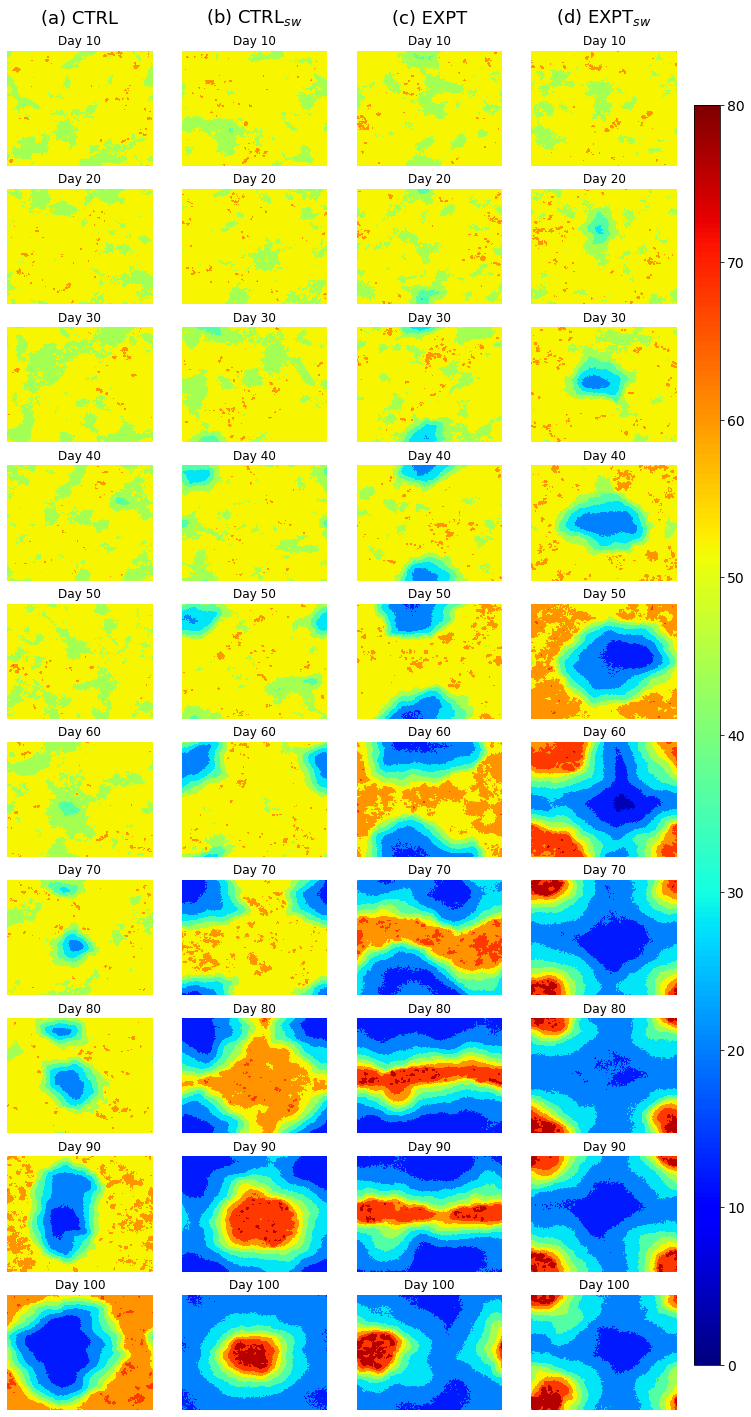

In [5]:
import matplotlib


clmin=0
clmax=80
cint=11 ;#2*cl+1
shading='jet'


# Create a 10x4 panel for plots, 4 rows corresponding to each case_names
fig, ax = plt.subplots(10, len(case_names), figsize=(12, 25), sharex=True, sharey=True, subplot_kw={'aspect': 'auto'})


# Plot PW for every 10th day for each case
for i, case_name in enumerate(case_names):
    plot_pw_for_every_10th_day_for_case(case_name, ax,clmin,clmax,cint,shading)

    
# Add labels above each column
for i, label in enumerate(physical_name):
    ax[0, i].text(0.5, 1.2, f'{label}', transform=ax[0, i].transAxes, fontsize=18,
                  ha='center', va='bottom')
    
# Create a colorbar
norm = matplotlib.colors.Normalize(vmin=clmin, vmax=clmax,clip=True)
sm = matplotlib.cm.ScalarMappable(cmap=shading, norm=norm)
sm.set_array([])

# plt.tight_layout()

# cbar_ax = fig.add_axes([1.0, 0.15, 0.015, 0.7])
# cbar_ax.tick_params(labelsize=14)
# plt.colorbar(sm, cax=cbar_ax, orientation='vertical')


# #Saving figure
# fig_directory='/fs3/home/bgoswami/work/20220913_SAM/SAM_Manuscript_01/Final_Figs'
# figname="Figure_1"

# plt.savefig(''+str(fig_directory)+'/'+str(figname)+'.png', format="png",transparent=True, dpi=1200)
# plt.savefig(''+str(fig_directory)+'/'+str(figname)+'.svg', format="svg",transparent=True, dpi=1200)
# !rsvg-convert -f pdf -o {fig_directory}/{figname}.pdf {fig_directory}/{figname}.svg
# plt.show()

# Create a colorbar
cbar_width = 0.03  # Adjust the width of the colorbar as needed
cbar_ax = fig.add_axes([0.92, 0.15, cbar_width, 0.7])  # Adjust the position and width as needed
cbar_ax.tick_params(labelsize=14)
cbar = plt.colorbar(sm, cax=cbar_ax, orientation='vertical')

#Saving figure
fig_directory='/fs3/home/bgoswami/work/20220913_SAM/SAM_Manuscript_01/Final_Figs'
figname="Figure_1"

#plt.savefig(f'{fig_directory}/{figname}.png', format="png", transparent=True, dpi=1200)
plt.savefig(f'{fig_directory}/{figname}.svg', format="svg", transparent=True, dpi=1200)
plt.savefig(f'{fig_directory}/{figname}.pdf', format="pdf", transparent=True, dpi=1200)
plt.show()